<a href="https://colab.research.google.com/github/cacbondioxit/Central_Limit_Theorem_Visualising/blob/main/Central_Limit_Theorem_Visualising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install scipy.stats.sampling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement scipy.stats.sampling (from versions: none)
ERROR: No matching distribution found for scipy.stats.sampling


In [3]:
import scipy.stats as stats
from scipy.stats import binom
from scipy.stats import poisson, norm, expon, uniform

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import random

Text(0.5, 1.0, 'Poisson(1.3)')

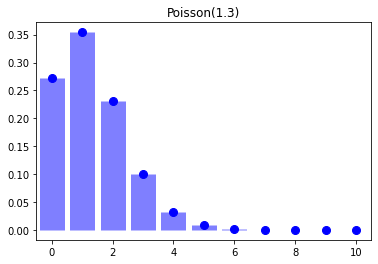

In [ ]:
fig, ax = plt.subplots(1,1)
mu = 1.3
x = np.arange(poisson.ppf(0.0001, mu),
              poisson.ppf(0.9999999, mu))
ax.plot(x, poisson.pmf(x, mu), 'bo', ms=8, label='poisson pmf')
ax.vlines(x, 0, poisson.pmf(x, mu), colors='b', lw=25, alpha=0.5)
ax.set_title("Poisson(1.3)")

Text(0.5, 1.0, 'B(40, 0.9)')

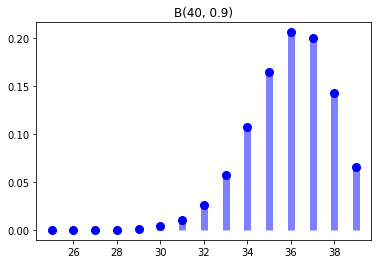

In [ ]:
fig, ax = plt.subplots(1,1)
scale = 1.3
x = np.arange(binom.ppf(0.000001, 40, 0.9),
              binom.ppf(0.99999999999, 40, 0.9))
ax.plot(x, binom.pmf(x, 40, 0.9), 'bo', ms=8, label='expon pmf')
ax.vlines(x, 0, binom.pmf(x, 40, 0.9), colors='b', lw=7, alpha=0.5)
ax.set_title("B(40, 0.9)")

Text(0.5, 1.0, 'Exponential(2.3)')

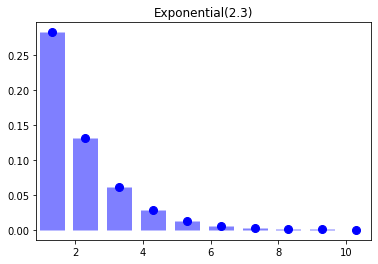

In [ ]:
fig, ax = plt.subplots(1,1)
scale = 1.3
x = np.arange(expon.ppf(0.00001, mu),
              expon.ppf(0.9999, mu))
ax.plot(x, expon.pdf(x, scale=scale), 'bo', ms=8, label='expon pmf')
ax.vlines(x, 0, expon.pdf(x, scale=scale), colors='b', lw=25, alpha=0.5)
ax.set_title("Exponential(2.3)")

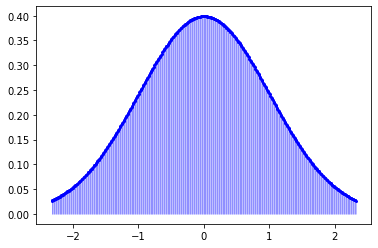

In [ ]:
fig, ax = plt.subplots(1,1)
mu = 0
sigma = 1
x = np.arange(norm.ppf(0.01, mu, sigma),
              norm.ppf(0.99, mu, sigma), 0.01)
ax.plot(x, norm.pdf(x, mu, sigma), 'bo', ms=2, label='norm pdf')
ax.vlines(x, 0, norm.pdf(x, mu, sigma), colors='b', lw=0.5, alpha=0.5)

In [ ]:
norm.pdf(1, mu, sigma)

0.36827014030332333

In [ ]:
n_samples = 500

random.random()

0.26816925846118844

(array([9.7600e+02, 5.5160e+03, 1.2245e+04, 1.4379e+04, 9.9860e+03,
        4.7420e+03, 1.6500e+03, 4.1500e+02, 7.7000e+01, 1.4000e+01]),
 array([0.  , 0.42, 0.84, 1.26, 1.68, 2.1 , 2.52, 2.94, 3.36, 3.78, 4.2 ]),
 <a list of 10 Patch objects>)

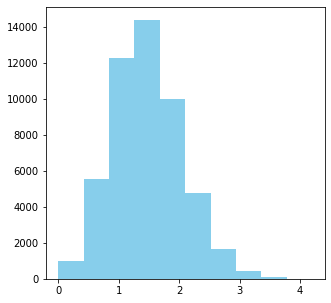

In [ ]:
mu=1.5
snorm = stats.poisson(mu)
xbar_list = []

for i in range(50000):
    samps = snorm.rvs(size=5)
    xbar = samps.mean()
    xbar_list.append(xbar)

fig, ax = plt.subplots(figsize=(5,5))
x = np.linspace(-0.5, 0.5, 50000)

#sns.histplot(xbar_list, ax=ax)

ax.hist(xbar_list, color = "skyblue")
# sns.distplot(xbar_list, ax=ax)

In [15]:
xbar_list_poisson = []
xbar_list_expon = []
xbar_list_binom = []
xbar_list_uniform = []

n_list = [1, 5, 30, 100]
mu=1.5
scale = 2
n=40
p=0.9

for i in range(4):
    xbar_list_poisson_1 = []
    xbar_list_expon_1 = []
    xbar_list_binom_1 = []
    xbar_list_uniform_1 = []
    for _ in range(50000):
        xbar = stats.poisson(mu).rvs(size=n_list[i]).mean()
        xbar_list_poisson_1.append(xbar)
        xbar = stats.expon(scale = scale).rvs(size=n_list[i]).mean()
        xbar_list_expon_1.append(xbar)
        xbar = stats.binom(n, p).rvs(size=n_list[i]).mean()
        xbar_list_binom_1.append(xbar)
        xbar = stats.uniform().rvs(size=n_list[i]).mean()
        xbar_list_uniform_1.append(xbar)
    xbar_list_poisson.append(xbar_list_poisson_1)
    xbar_list_expon.append(xbar_list_expon_1)
    xbar_list_binom.append(xbar_list_binom_1)
    xbar_list_uniform.append(xbar_list_uniform_1)



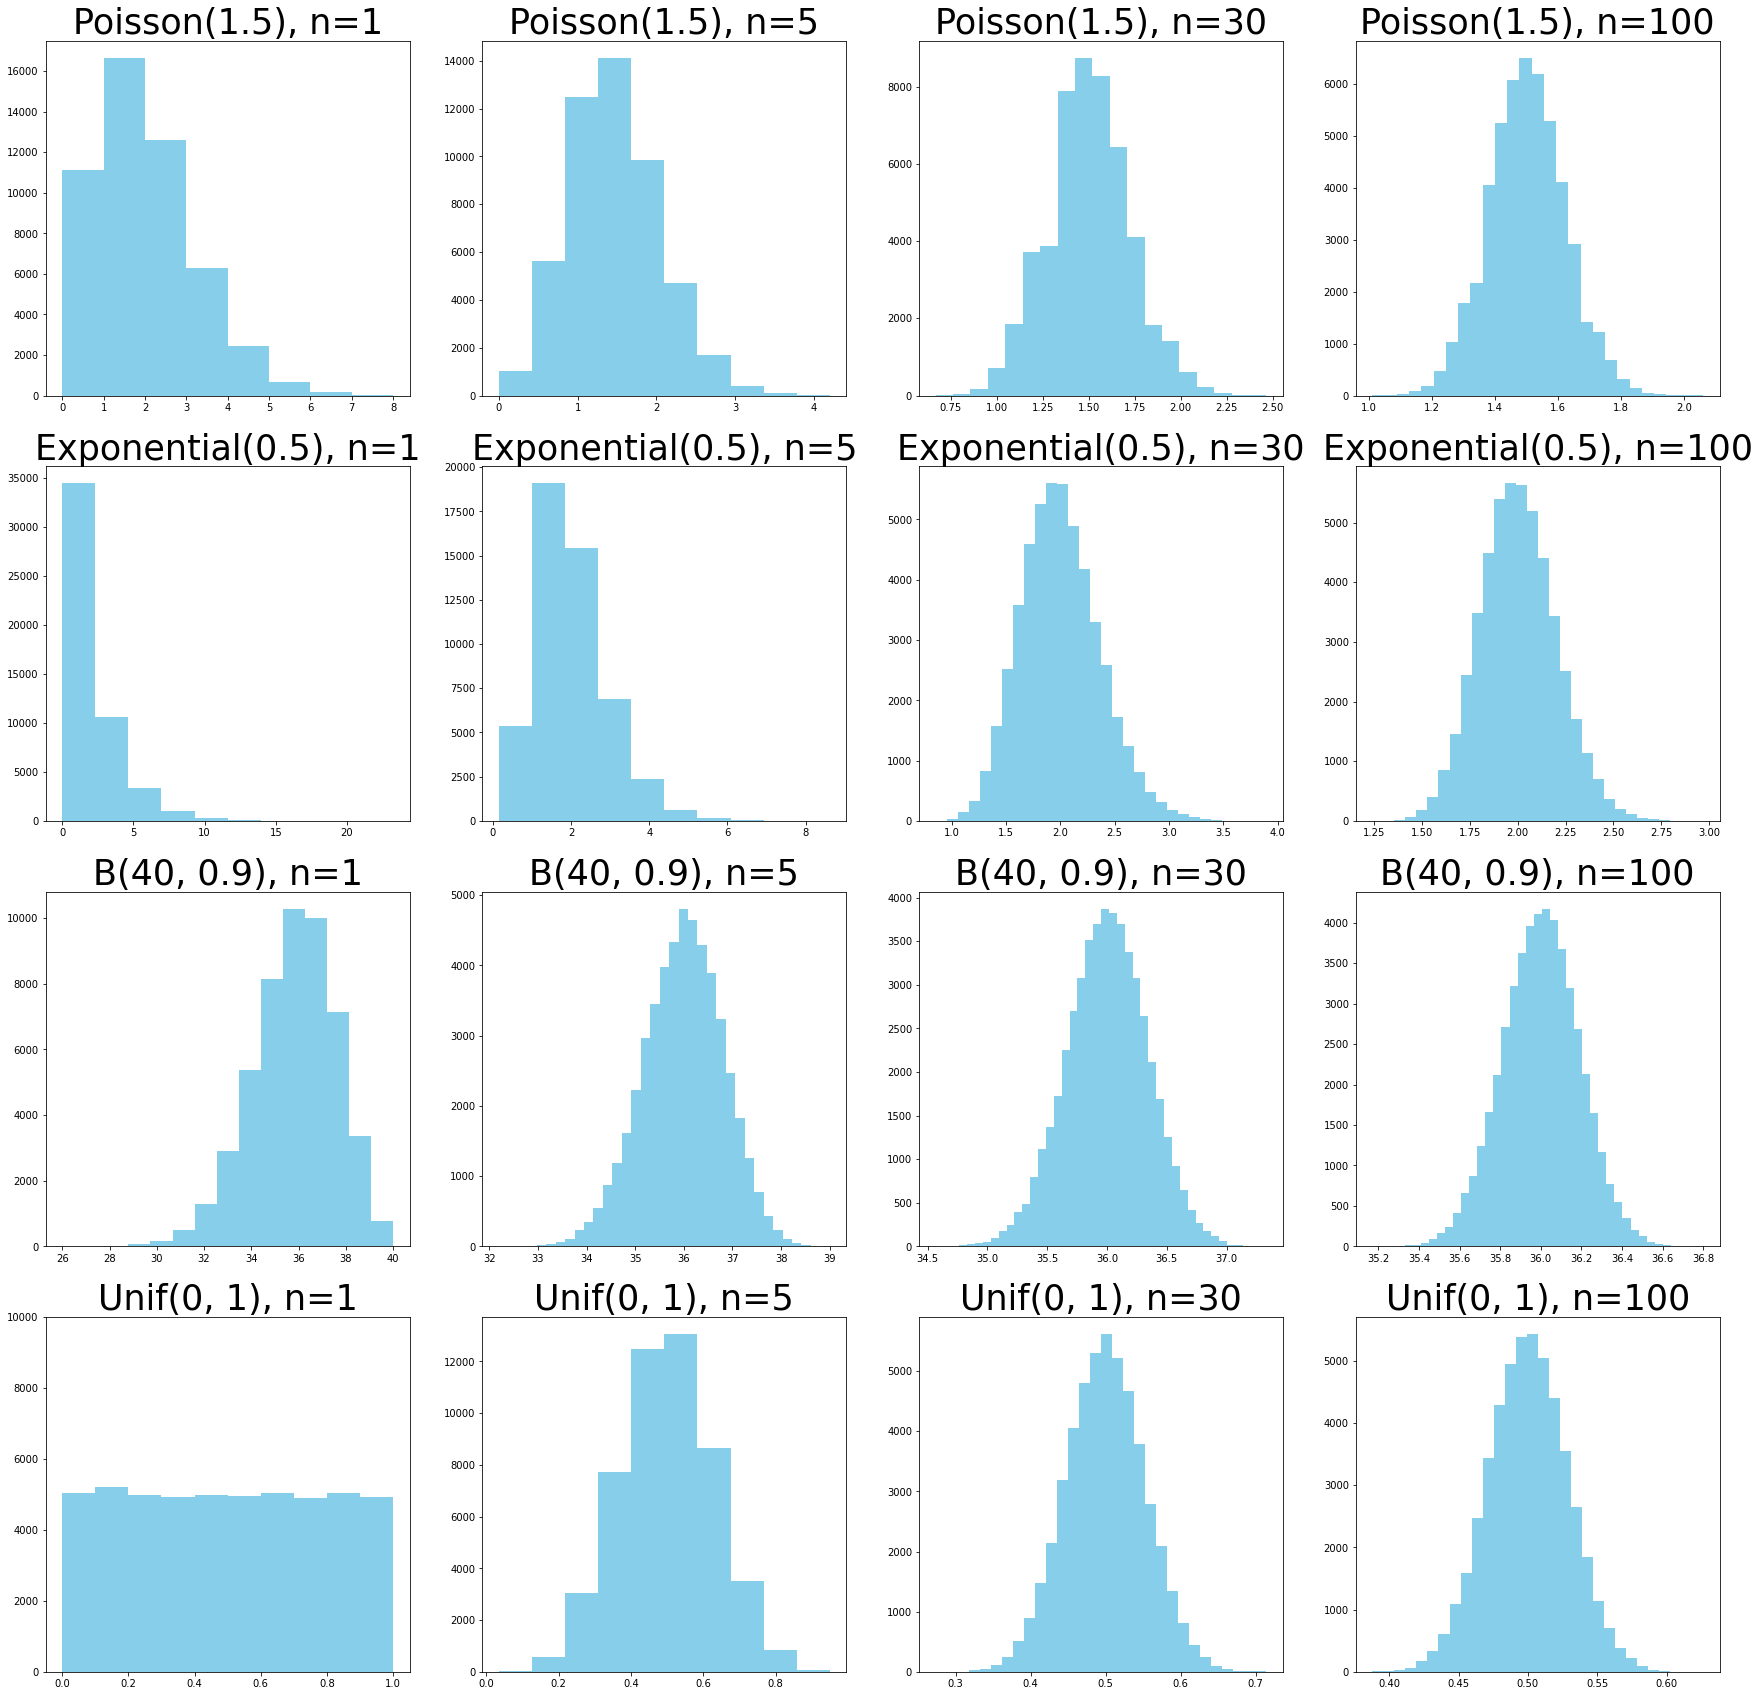

In [72]:
fig, ax = plt.subplots(4,4,figsize=(30, 30))
# fig.suptitle('CENTRAL LIMIT THEOREM VISUALISING', fontsize=30)
for i in range(4):
    if i==0:
        ax[0][i].hist(xbar_list_poisson[i], color = "skyblue", bins=8)
        ax[1][i].hist(xbar_list_expon[i], color = "skyblue", bins=10)
        ax[2][i].hist(xbar_list_binom[i], color = "skyblue", bins=15)
        ax[3][i].hist(xbar_list_uniform[i], color = "skyblue")
        ax[3][i].set_ylim(0,10000)
    if i==1:
        ax[0][i].hist(xbar_list_poisson[i], color = "skyblue", bins=10)
        ax[1][i].hist(xbar_list_expon[i], color = "skyblue", bins=10)
        ax[2][i].hist(xbar_list_binom[i], color = "skyblue", bins=35)
        ax[3][i].hist(xbar_list_uniform[i], color = "skyblue")
    if i==2:
        ax[0][i].hist(xbar_list_poisson[i], color = "skyblue", bins=19)
        ax[1][i].hist(xbar_list_expon[i], color = "skyblue", bins=30)
        ax[2][i].hist(xbar_list_binom[i], color = "skyblue", bins=42)
        ax[3][i].hist(xbar_list_uniform[i], color = "skyblue", bins=30)
    if i==3:
        ax[0][i].hist(xbar_list_poisson[i], color = "skyblue", bins=27)
        ax[1][i].hist(xbar_list_expon[i], color = "skyblue", bins=30)
        ax[2][i].hist(xbar_list_binom[i], color = "skyblue", bins=41)
        ax[3][i].hist(xbar_list_uniform[i], color = "skyblue", bins=30)
    ax[0][i].set_title("Poisson({}), n={}".format(mu, n_list[i]), fontsize=35)
    ax[1][i].set_title("Exponential({:.1f}), n={}".format(1/scale, n_list[i]), fontsize=35)
    ax[2][i].set_title("B({}, {}), n={}".format(n, p, n_list[i]), fontsize=35)
    ax[3][i].set_title("Unif(0, 1), n={}".format(n_list[i]), fontsize=35)
